In [27]:
36*29

1044

In [2]:
# 首先把groupA的表格合并 
import pandas as pd
import os
Folder_Path = r"D:\jupy nt\2019_6_datahomework\memory2"          #要拼接的文件夹及其完整路径，注意不要包含中文
SaveFile_Path =  r"D:\jupy nt\2019_6_datahomework\result"       #拼接后要保存的文件路径
SaveFile_Name = r"all_memory2.csv"              #合并后要保存的文件名

#修改当前工作目录
os.chdir(Folder_Path)
#将该文件夹下的所有文件名存入一个列表
file_list = os.listdir()

#读取第一个CSV文件并包含表头
df = pd.read_csv(Folder_Path +'\\'+ file_list[0])   #编码默认UTF-8，若乱码自行更改

#将读取的第一个CSV文件写入合并后的文件保存
df.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8_sig",index=False)

#循环遍历列表中各个CSV文件名，并追加到合并后的文件
for i in range(1,len(file_list)):
    df = pd.read_csv(Folder_Path + '\\'+ file_list[i])
    df.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8_sig",index=False, header=False, mode='a+')


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m1_data = pd.read_csv(r"D:\jupy nt\2019_6_datahomework\all\all_memory1.csv")

m1_data = pd.DataFrame(m1_data)
#判断有多少个NaN
#a = (m1_data.isnull()).sum()
#print(a)

m1_data = m1_data.dropna()


#m1_data.shape
#m1_data.describe()
#m1_data.to_csv(r"D:\jupy nt\2019_6_datahomework\all\all_memory_cl.csv",index = False) 这是导出的没有nan的数据

conditions = []
for i in m1_data["video"]:
    if "FW" in i :
        conditions.append("FW")
    if "RV" in i :
        conditions.append("RV")
#print(list(conditions))
m1_data['condition'] = list((conditions))
c = m1_data.pop('condition')
m1_data.insert(1,"condition",c)
m1_data.drop(["video"],axis = 1,inplace = True)
m1_data.sort_values(by = ["subject"] , ascending = True ,inplace = True) #把subject排序
#这时候 数据就清晰多了，接下来 要计算每个被试的情况
g_1 =m1_data.groupby(['subject','condition'])
corr_percent = g_1['Probe_response.corr'].mean()
#corr_percent.to_csv(r"D:\jupy nt\2019_6_datahomework\all\correct.csv",index = True)
#print(corr_percent)
g_2 = m1_data.groupby(['subject','Probe_response.corr'])
corr_rt = g_2['Probe_response.rt'].mean()
conf_mean = g_2['Conf_response.keys'].mean()
#corr_rt.to_csv(r"D:\jupy nt\2019_6_datahomework\all\rt.csv",index = True)
#conf_mean.to_csv(r"D:\jupy nt\2019_6_datahomework\all\conf.csv",index = True)
#print(corr_rt)
#print(conf_mean)
# happy
#m1_data.head()

    

In [82]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# df = pd.read_csv(r"D:\jupy nt\2019_6_datahomework\all\memory1_gA_corr_rt_conf.csv")




,subject,condition,correct percentage,subject.1,correct,RT,subject.2,correct.1,conf_rating
0,1,FW,0.722222,1,0,11.564656,1,0,3.187500
1,1,RV,0.388889,1,1,9.568992,1,1,3.800000
2,3,FW,0.666667,3,0,3.948248,3,0,2.647059
3,3,RV,0.388889,3,1,3.338623,3,1,2.736842
4,4,FW,0.888889,4,0,5.172024,4,0,3.866667
5,4,RV,0.277778,4,1,5.614969,4,1,3.666667
6,5,FW,0.888889,5,0,5.369007,5,0,4.000000
7,5,RV,0.222222,5,1,5.516466,5,1,3.700000
8,6,FW,0.777778,6,0,7.351945,6,0,3.375000
9,6,RV,0.333333,6,1,7.063522,6,1,2.850000


In [17]:
import pandas as pd
import os
import numpy as np

Folder_Path = r'D:\jupy nt\2019_6_datahomework\groupB'          #要拼接的文件夹及其完整路径，注意不要包含中文
SaveFile_Path =  r"D:\jupy nt\2019_6_datahomework\all"       #拼接后要保存的文件路径
SaveFile_Name = r"all_memory1_B.csv"              #合并后要保存的文件名

#修改当前工作目录
os.chdir(Folder_Path)
#将该文件夹下的所有文件名存入一个列表
file_list = os.listdir()

#读取第一个CSV文件并包含表头
df = pd.read_csv(Folder_Path +'\\'+ file_list[0])   #编码默认UTF-8，若乱码自行更改

#将读取的第一个CSV文件写入合并后的文件保存
df.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8_sig",index=False)

#循环遍历列表中各个CSV文件名，并追加到合并后的文件
for i in range(1,len(file_list)):
    df = pd.read_csv(Folder_Path + '\\'+ file_list[i])
    df.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8_sig",index=False, header=False, mode='a+')





,video,probesfolder,Image1,Image2,Task_Series.thisRepN,Task_Series.thisTrialN,Task_Series.thisN,Task_Series.thisIndex,Probe_Tests.thisRepN,Probe_Tests.thisTrialN,...,Conf_response.corr,Conf_response.rt,session,subject,Language,Sex,Age,date,expName,frameRate
0,Edited Clips (40s)\Group B\Savage Kingdom Doc ...,40s Savage Kingdom Doc 2 Probes Z.xlsx,Edited Clips (40s)\Savage Kingdom Doc 2 Probes...,Edited Clips (40s)\Savage Kingdom Doc 2 Probes...,0,0,0,10,0.0,0.0,...,0.0,4.068365,1,21,"['C', 'h', 'i', 'n', 'e', 's', 'e']","['M', 'a', 'l', 'e']",31,2019_Jan_13_0830,Paradigm Encoding Phase,59.947274
1,Edited Clips (40s)\Group B\Savage Kingdom Doc ...,40s Savage Kingdom Doc 2 Probes Z.xlsx,Edited Clips (40s)\Savage Kingdom Doc 2 Probes...,Edited Clips (40s)\Savage Kingdom Doc 2 Probes...,0,0,0,10,0.0,1.0,...,0.0,3.030498,1,21,"['C', 'h', 'i', 'n', 'e', 's', 'e']","['M', 'a', 'l', 'e']",31,2019_Jan_13_0830,Paradigm Encoding Phase,59.947274
2,Edited Clips (40s)\Group B\Savage Kingdom Doc ...,40s Savage Kingdom Doc 2 Probes Z.xlsx,Edited Clips (40s)\Savage Kingdom Doc 2 Probes...,Edited Clips (40s)\Savage Kingdom Doc 2 Probes...,0,0,0,10,0.0,2.0,...,0.0,2.664392,1,21,"['C', 'h', 'i', 'n', 'e', 's', 'e']","['M', 'a', 'l', 'e']",31,2019_Jan_13_0830,Paradigm Encoding Phase,59.947274
4,Edited Clips (40s)\Group B\Nat Geo Exotic Anim...,40s Nat Geo Exotic Animals 2 Probes Z.xlsx,Edited Clips (40s)\Nat Geo Exotic Animals 2 Pr...,Edited Clips (40s)\Nat Geo Exotic Animals 2 Pr...,0,1,1,4,0.0,0.0,...,0.0,2.473290,1,21,"['C', 'h', 'i', 'n', 'e', 's', 'e']","['M', 'a', 'l', 'e']",31,2019_Jan_13_0830,Paradigm Encoding Phase,59.947274
5,Edited Clips (40s)\Group B\Nat Geo Exotic Anim...,40s Nat Geo Exotic Animals 2 Probes Z.xlsx,Edited Clips (40s)\Nat Geo Exotic Animals 2 Pr...,Edited Clips (40s)\Nat Geo Exotic Animals 2 Pr...,0,1,1,4,0.0,1.0,...,0.0,1.439702,1,21,"['C', 'h', 'i', 'n', 'e', 's', 'e']","['M', 'a', 'l', 'e']",31,2019_Jan_13_0830,Paradigm Encoding Phase,59.947274


In [73]:
import pandas as pd
import os
import numpy as np
m1_datab = pd.read_csv(r"D:\jupy nt\2019_6_datahomework\all\all_memory1_B.csv")
m1_datab = pd.DataFrame(m1_datab)
# a = (m1_datab.isnull()).sum()
m1_datab.dropna(inplace = True)

conditions = []
for i in m1_datab["video"]:
    if "FW" in i :
        conditions.append("FW")
    if "RV" in i :
        conditions.append("RV")
m1_datab['condition'] = list(conditions)
c= m1_datab.pop('condition')
m1_datab.insert(1,'condition',c)
m1_datab.drop(["video"],axis = 1,inplace = True)
m1_datab.sort_values(by = ["subject"], ascending = True , inplace = True)
g_1 = m1_datab.groupby(['subject','condition'])
corr_per = g_1["Probe_response.corr"].mean()
g_2 = m1_datab.groupby(['subject','Probe_response.corr'])
corr_rt = g_2['Probe_response.rt'].mean()
conf_mean = g_2['Conf_response.keys'].mean()
#corr_per.to_csv(r"D:\jupy nt\2019_6_datahomework\all\correctb.csv",index = True)
# corr_rt.to_csv(r"D:\jupy nt\2019_6_datahomework\all\rtb.csv",index = True)
# conf_mean.to_csv(r"D:\jupy nt\2019_6_datahomework\all\confb.csv",index = True)
# df =pd.DataFrame(list(zip(g_1,g_2))) 
#df1=pd.DataFrame(list(zip(corr_per,corr_rt,conf_mean)))



condition
FW    0.758681
RV    0.362847
Name: correct percentage, dtype: float64 condition
FW    0.653846
RV    0.452991
Name: correct per, dtype: float64 condition
FW    0.026291
RV    0.031552
Name: correct percentage, dtype: float64 condition
FW    0.031788
RV    0.031062
Name: correct per, dtype: float64 condition
FW    0.146382
RV    0.175673
Name: correct percentage, dtype: float64 condition
FW    0.158938
RV    0.155311
Name: correct per, dtype: float64


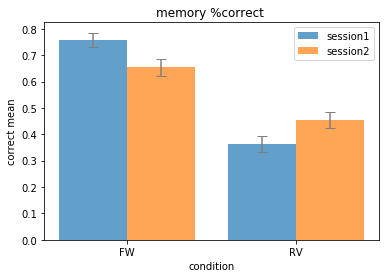

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import t


df = pd.read_csv(r"D:\jupy nt\2019_6_datahomework\all\memory1_corr_rt_conf.csv")
df1 = pd.read_csv(r"D:\jupy nt\2019_6_datahomework\all\memory2_corr_rt_conf.csv") 
df = pd.DataFrame(df)
# df.info()
n = 32
n2 = 26
g_1 = df.groupby(['condition'])
m1 = g_1['correct percentage'].mean()
std1 = g_1['correct percentage'].std()
se1 = std1/np.sqrt(n-1)
g_2 = df1.groupby(['condition'])
m2 = g_2['correct per'].mean()
std2 = g_2['correct per'].std()
se2 = std2/np.sqrt(n2-1)
y1 = list(m1)
y2 = list(m2)
s1 = list(se1)
s2 = list(se2)

x = np.array([1,1.5])

plt.title("memory %correct ")
plt.bar(x,y1,yerr = s1,alpha=0.7,width = 0.2,label = "session1",error_kw = {'ecolor' : 'grey', 'capsize' :5})
plt.bar(x+0.2,y2,yerr = s2,alpha=0.7,width = 0.2,label = "session2",error_kw = {'ecolor' : 'grey', 'capsize' :5
                                                                               })
plt.xticks(x+0.1,["FW","RV"])
plt.ylabel("correct mean")
plt.xlabel("condition")
plt.legend(loc = 'best') 
# plt.show()
plt.savefig(r"D:\jupy nt\2019_6_datahomework\all\memory.png")
print(m1,m2,se1,se2,std1,std2)

C:\Users\Liquid\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


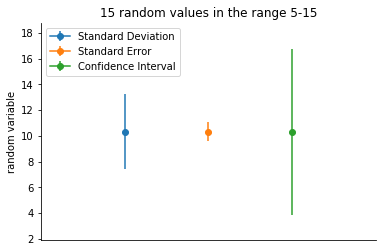

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import t

# 在5-15范围内生成15个随机数据点
X = np.random.randint(5, 15, 15)

# 样本大小
n = X.size

# 平均
X_mean = np.mean(X)

# standard deviation
X_std = np.std(X)

# standard error
X_se = X_std / np.sqrt(n)
# alternatively:
#    from scipy import stats
#    stats.sem(X)

# 95% Confidence Interval

dof = n - 1         # degrees of freedom
alpha = 1.0 - 0.95
conf_interval = t.ppf(1-alpha/2., dof) * X_std*np.sqrt(1.+1./n)

fig = plt.gca()
plt.errorbar(1, X_mean, yerr=X_std, fmt='-o')
plt.errorbar(2, X_mean, yerr=X_se, fmt='-o')
plt.errorbar(3, X_mean, yerr=conf_interval, fmt='-o')

plt.xlim([0,4])
plt.ylim(X_mean-conf_interval-2, X_mean+conf_interval+2)

# axis formatting
fig.axes.get_xaxis().set_visible(False)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
                labelbottom="on", left="on", right="off", labelleft="on")

plt.legend(['Standard Deviation', 'Standard Error', 'Confidence Interval'],
           loc='upper left',
           numpoints=1,
           fancybox=True)

plt.ylabel('random variable')
plt.title('15 random values in the range 5-15')

plt.show()


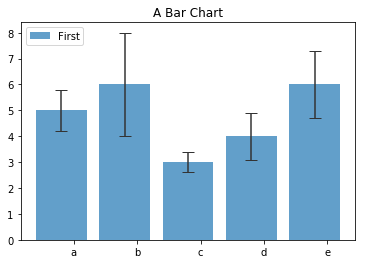

In [19]:
import matplotlib.pyplot as plt

index = np.arange(5)
values = [5, 6, 3, 4, 6]
SD = [0.8, 2, 0.4, 0.9, 1.3]
plt.title('A Bar Chart')
plt.bar(index, values, yerr = SD, error_kw = {'ecolor' : '0.2', 'capsize' :6}, alpha=0.7, label = 'First')
plt.xticks(index+0.2,['a', 'b', 'c', 'd', 'e'])
plt.legend(loc=2)
plt.show()


correct
0    3.336417
1    3.377615
Name: conf_rating, dtype: float64 corr/inc
0    2.840025
1    2.990860
Name: conf, dtype: float64 correct
0    0.081772
1    0.079198
Name: conf_rating, dtype: float64 corr/inc
0    0.145792
1    0.138175
Name: conf, dtype: float64 correct
0    0.455287
1    0.440957
Name: conf_rating, dtype: float64 corr/inc
0    0.728961
1    0.690875
Name: conf, dtype: float64


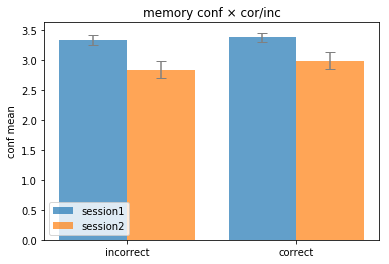

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
df = pd.read_csv(r"D:\jupy nt\2019_6_datahomework\all\memory1_corr_rt_conf.csv")
df1 = pd.read_csv(r"D:\jupy nt\2019_6_datahomework\all\memory2_corr_rt_conf.csv") 
df = pd.DataFrame(df)
# df.info()
n = 32
n2 = 26
g_1 = df.groupby(['correct'])
m1 = g_1['conf_rating'].mean()
std1 = g_1['conf_rating'].std()
se1 = std1/np.sqrt(n-1)
g_2 = df1.groupby(['corr/inc'])
m2 = g_2['conf'].mean()
std2 = g_2['conf'].std()
se2 = std2/np.sqrt(n2-1)
y1 = list(m1)
y2 = list(m2)
s1 = list(se1)
s2 = list(se2)

x = np.array([1,1.5])

plt.title("memory conf × cor/inc")
plt.bar(x,y1,yerr = s1,alpha=0.7,width = 0.2,label = "session1",error_kw = {'ecolor' : 'grey', 'capsize' :5})
plt.bar(x+0.2,y2,yerr = s2,alpha=0.7,width = 0.2,label = "session2",error_kw = {'ecolor' : 'grey', 'capsize' :5})
plt.xticks(x+0.1,["incorrect","correct"])
plt.ylabel("conf mean")
# plt.xlabel("")
plt.legend(loc = 'best') 
#plt.show()
plt.savefig(r"D:\jupy nt\2019_6_datahomework\all\memory_conf_in_corr.png")
print(m1,m2,se1,se2,std1,std2)

correct
0    9.841014
1    8.724463
Name: RT, dtype: float64 corr/inc
0    7.452408
1    7.134112
Name: RT, dtype: float64 correct
0    0.081772
1    0.079198
Name: conf_rating, dtype: float64 corr/inc
0    0.145792
1    0.138175
Name: conf, dtype: float64


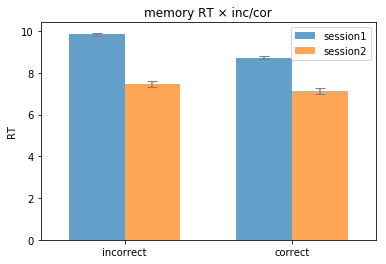

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
df = pd.read_csv(r"D:\jupy nt\2019_6_datahomework\all\memory1_corr_rt_conf.csv")
df1 = pd.read_csv(r"D:\jupy nt\2019_6_datahomework\all\memory2_corr_rt_conf.csv") 
df = pd.DataFrame(df)

n = 32
n2 = 26
g_1 = df.groupby(['correct'])
m1 = g_1['RT'].mean()
se1 = g_1['conf_rating'].std()/np.sqrt(n-1)
g_2 = df1.groupby(['corr/inc'])
m2 = g_2['RT'].mean()
se2 = g_2['conf'].std()/np.sqrt(n2-1)
x1 = [1,4]
x2 = [2,5]
y1 = list(m1)
y2 = list(m2)
s1 = list(se1)
s2 = list(se2)
print(m1,m2,se1,se2)
plt.title("memory RT × inc/cor")
plt.xlim(0,6)
plt.xticks([1.5,4.5],["incorrect","correct"])
plt.ylabel("RT") 
plt.bar(x1,y1,yerr = s1,alpha=0.7,width = 1,label = "session1",error_kw = {'ecolor' : 'grey', 'capsize' :5})
plt.bar(x2,y2,yerr = s2,alpha=0.7,width = 1,label = "session2",error_kw = {'ecolor' : 'grey', 'capsize' :5})
plt.legend(loc = 'best')
plt.savefig(r"D:\jupy nt\2019_6_datahomework\all\memory_rt_in_corr.png")